---
---

<h1><center><ins>Exercise Sheet 9</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import pearsonr 

# Exercise 1 - Fit a straight line 

The attached data file (```mmr_lg.dat```) contains observations of two quantities (mass and metallicity) measured for a sample of nearby galaxies. This file contains four columns: log10(mass), average metallicity, error on log10(mass) and error on average metallicity. 

*For this exercise, you can neglect the error on the mass, and consider only the one on the metallicity.*

**(A)** Fit a straight line to this dataset. To do this, first write down your model, and define the model parameters you will consider. By using the equations we saw in the lecture, compute:

* the best-fit values for your model parameters
* the uncertainties on the parameters, the covariance and the correlation coefficient $r_{\rm ab}$ on the parameters errors
* the goodness of fit. 

**(B)** Discuss the results you obtained in point (A).

**(C)** Compute the Pearson's correlation coefficient $r$ for this data set. How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

     mass  metallicity  error_mass  error_metallicity
0   7.802        -1.28       0.347              0.407
1   9.650        -0.55       0.106              0.272
2   8.835        -1.07       0.312              0.470
3   7.437        -1.29       0.625              0.229
4   6.440        -1.95       0.088              0.414
5   5.252        -2.29       0.461              0.248
6   5.810        -1.94       0.003              0.374
7   6.787        -1.46       0.093              0.423
8   6.526        -1.70       0.330              0.296
9   5.275        -2.01       0.422              0.311
10  4.633        -2.59       0.075              0.279
11  2.521        -2.73       0.393              0.458
12  6.113        -1.97       0.244              0.291
13  8.638        -1.20       0.026              0.381
14  4.352        -2.07       0.030              0.288
15  3.682        -1.40       0.495              0.305
16  6.040        -1.99       0.232              0.348
17  5.274        -2.13      

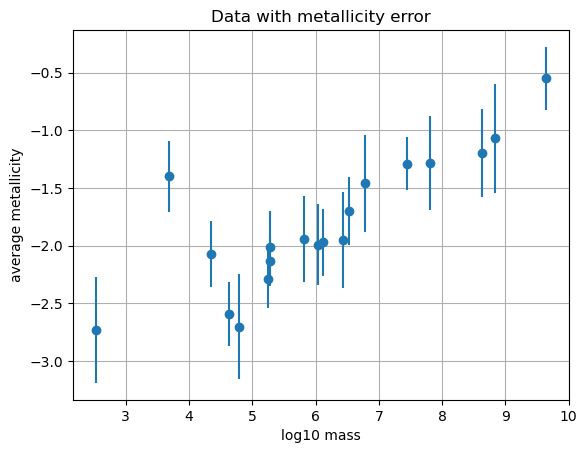

In [22]:
df = pd.read_csv("mmr_lg.dat", sep=r"\s+", names = ["log10(mass)", "average_metallicity", "error_log10(mass)", "error_average_metallicity"]) 
df.columns = ["mass", "metallicity", "error_mass", "error_metallicity"]

print(df)

plt.errorbar(df["mass"],
             df["metallicity"],
             yerr=df["error_metallicity"],
             fmt="o")
plt.title("Data with metallicity error")
plt.xlabel("log10 mass")
plt.ylabel("average metallicity")
plt.grid(True)
plt.show() 

Best-fit parameters:
a = 0.27205 ± 0.04321
b = -3.45029 ± 0.27170

Covariance matrix:
[[ 0.00186673 -0.01131905]
 [-0.01131905  0.07382046]] 

Correlation coefficient r_ab = -0.96423

Goodness of fit:
chi-squared = 19.928
chi-squared/dof = 1.172


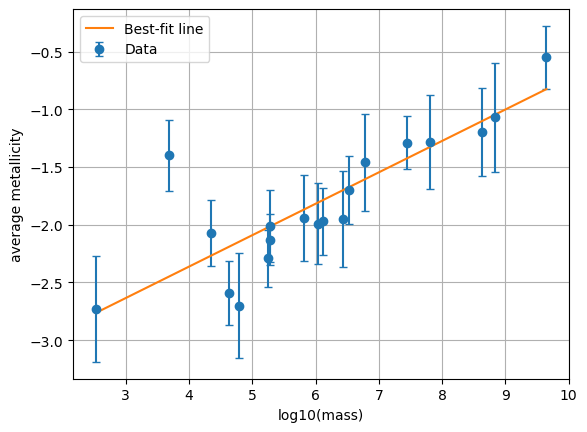

In [28]:
data = np.loadtxt("mmr_lg.dat")

mass  = data[:,0]
metallicity  = data[:,1]
err_metallicity = data[:,3] 


w = 1 / err_metallicity**2   # weights

# Build design matrix
X = np.vstack([mass, np.ones(len(mass))]).T   # columns: [x, 1], transposed  

# Weighted least squares 
W = np.diag(w)

#cov = np.linalg.inv(np.dot(np.dot(X.T, W), X))   # covariance matrix of (a,b)
#a, b = np.dot(cov, np.dot(np.dot(X.T, W), y)) # best-fit parameters

# covariance more intuitive then above 
XT = X.T                 # X transpose
XTW = np.dot(XT, W)      # X^T W
XTWX = np.dot(XTW, X)    # X^T W X
cov = np.linalg.inv(XTWX)

XTWy = np.dot(XTW, y)    # X^T W y
params = np.dot(cov, XTWy)

a = params[0]
b = params[1]

# parameter errors 
sigma_a = np.sqrt(cov[0,0])
sigma_b = np.sqrt(cov[1,1])

# correlation coefficient 
r_ab = cov[0,1] / (sigma_a * sigma_b)

# Chi squared 
# linear regression (straight line fit): y=ax+b 
y_model = a*mass + b
chi2 = np.sum(((metallicity - y_model)/err_metallicity)**2)
dof = len(mass) - 2           # degrees of freedom


print("Best-fit parameters:")
print(f"a = {a:.5f} ± {sigma_a:.5f}")
print(f"b = {b:.5f} ± {sigma_b:.5f}\n")

print("Covariance matrix:")
print(cov, "\n")

print(f"Correlation coefficient r_ab = {r_ab:.5f}\n")

print("Goodness of fit:")
print(f"chi-squared = {chi2:.3f}")
print(f"chi-squared/dof = {chi2/dof:.3f}") 

plt.errorbar(mass, metallicity, yerr=err_metallicity, fmt="o", capsize=3, label="Data")
x_fit = np.linspace(min(mass), max(mass), 200)
plt.plot(x_fit, a*x_fit + b, label="Best-fit line")

plt.xlabel("log10(mass)")
plt.ylabel("average metallicity")
plt.legend()
plt.grid(True) 
plt.show()

strong anticorrelation (r close to -1). Goodness of fit shows model works for the data. An underestimation of the errors could explain the little too high Chi-squared. 

In [39]:
# Pearson-Korrelationcoefficient 
r, p_value = pearsonr(mass, metallicity)

print("Pearson r =", r)
print("p-value    =", p_value)

Pearson r = 0.8267176065250418
p-value    = 1.2780004816224218e-05


Pearson coefficient doesn't consider errorbars and only shows unweighted linear correlation of datapoints. It is not useful to consider the quantity in this case, because it shows only correlation and doesnt consider measurement errors. 
Here: strong positive linear correlation of data points. Small p-value shows correlation is significant. 

# Exercise 2 - Familiarize with python built-in functions

**(A)** Take a look at the documentation of the following 3 python built-in functions:

* ```numpy.polynomial.polynomial.Polynomial.fit``` (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html)
* ```scipy.stats.linregress``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
* ```scipy.optimize.curve_fit``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Pay attention especially to the quantities and parameters that you need to provide to run these functions, and to those that are returned as result. For each function, provide an answer to the following questions:

1. What possible applications can this function be used for? (e.g.: fit of a straight line to data with errors on the dependent variable)
2. Are the returned quantities providing a full description of the fit? If not, what is missing?

**(B)** Use all the above functions to fit a straight line to the set of data from Exercise 1. What are the results you get for each of these methods? What differences do you find? Compare them also to the ones you obtained in Exercise 1: are there any differences?

**(C)** Fit a parabola to the same dataset. To do this, consider your answers to the questions in point (A) of this exercise, to decide which method to use. Provide all the quantities listed in point (A) of Exercise 1 and discuss the results you obtain, also in comparison to those you obtained when fitting a straight line to the data.

numpy ploynomial: 
1. 
polynomials of arbitrary degree to data 
Fitting models without weighting or uncertainty information 
Approximating function on an interval 

2. 
No, it returns the best-fit polynomial object and the coefficients 
Missing: uncertainties, Chi-squared value, covariance matrix, goodness of fit 


scipy linear regression: 
1. 
Linear regression: y=ax+b 
slope, intercept, and their uncertainties, person coefficient, simple straight line fits 

2. 
Returns: slope, intercept, standard errors of slope and intercept, Pearson correlation coefficient, p-value, standard deviation of residuals 
Missing: Covariance, no weighing, Chi-squared and Chi-square/dof 


scipy curve fit: 
1. 
Fitting arbitrary nonlinear models y=f(x,θ)
Weighted fits using sigma 
Nonlinear least-squares optimization 
Straight-line fits, exponential fits, Gaussians, power laws 

2. 
Almost: best-fit parameter values, covariance matrix, parameter uncertainties 
Missing: Chi-squared and correlation coeffient 


In [32]:
# Import some useful packages

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

In [34]:
p = Polynomial.fit(mass, metallicity, deg=1)
# Convert back to standard polynomial form (not scaled)
p_std = p.convert()

a_poly = p_std.coef[1]
b_poly = p_std.coef[0]

print("Polynomial.fit: a =", a_poly, " b =", b_poly)

res = linregress(mass, metallicity)

print("linregress slope =", res.slope)
print("linregress intercept =", res.intercept)
print("uncertainty slope =", res.stderr)
print("uncertainty intercept =", res.intercept_stderr)
print("r =", res.rvalue) 

def model(x, a, b):
    return a*x + b

popt, pcov = curve_fit(model, mass, metallicity, sigma=err_metallicity, absolute_sigma=True)
a_cf, b_cf = popt
da_cf, db_cf = np.sqrt(np.diag(pcov))

print("curve_fit slope =", a_cf, "+/-", da_cf)
print("curve_fit intercept =", b_cf, "+/-", db_cf)
print("covariance matrix:")
print(pcov) 


Polynomial.fit: a = 0.2650819487906169  b = -3.422604141339168
linregress slope = 0.265081948790617
linregress intercept = -3.4226041413391677
uncertainty slope = 0.04375336238113143
uncertainty intercept = 0.27783175555650447
r = 0.8267176065250413
curve_fit slope = 0.2720478920124679 +/- 0.043205614291181166
curve_fit intercept = -3.450290935794419 +/- 0.27169920230270256
covariance matrix:
[[ 0.00186673 -0.01131905]
 [-0.01131905  0.07382046]]


In [40]:
data = np.loadtxt("mmr_lg.dat")
mass  = data[:,0]
metallicity  = data[:,1]
err_metallicity = data[:,3]

# Parabolic model
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

# Weighted fit (same as in Exercise 1)
popt, pcov = curve_fit(parabola, mass, metallicity,
                       sigma=err_metallicity,
                       absolute_sigma=True)

a2, b2, c2 = popt
da2, db2, dc2 = np.sqrt(np.diag(pcov))

print("a =", a2, "+/-", da2)
print("b =", b2, "+/-", db2)
print("c =", c2, "+/-", dc2)
print("Covariance matrix:\n", pcov) 

# chi-square 
y_fit = parabola(mass, a2, b2, c2)
chi2 = np.sum(((metallicity - y_fit) / err_metallicity) ** 2)

dof = len(mass) - 3  # now 3 parameters

print("chi2 =", chi2)
print("chi2/dof =", chi2/dof) 

cor_ab = pcov[0,1] / (da2 * db2)
cor_ac = pcov[0,2] / (da2 * dc2)
cor_bc = pcov[1,2] / (db2 * dc2) 


a = 0.04289122528567176 +/- 0.020499518898806284
b = -0.28273052474855015 +/- 0.2686489623996799
c = -1.7824965421554193 +/- 0.8421420541280269
Covariance matrix:
 [[ 4.20230275e-04 -5.43548676e-03  1.63403513e-02]
 [-5.43548676e-03  7.21722650e-02 -2.22674033e-01]
 [ 1.63403513e-02 -2.22674033e-01  7.09203239e-01]]
chi2 = 15.550090229576927
chi2/dof = 0.971880639348558


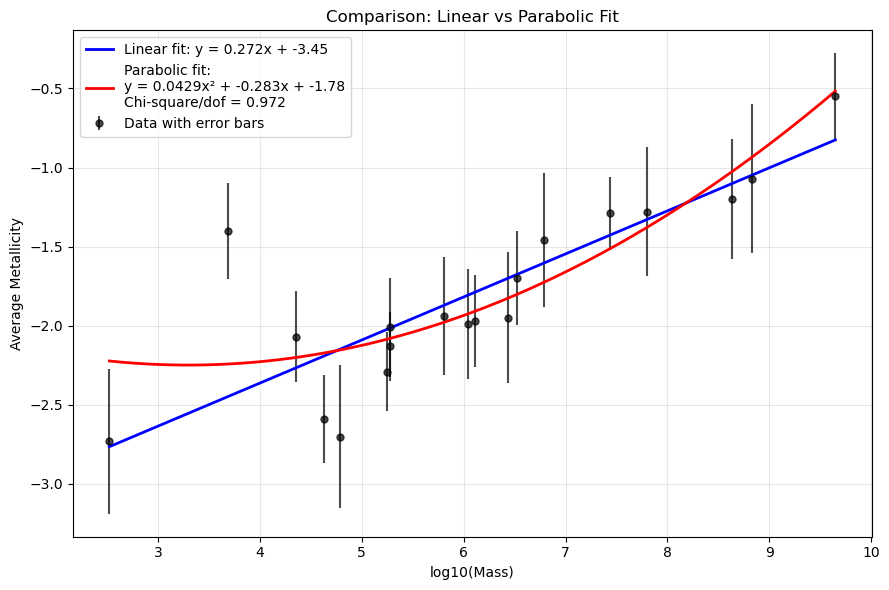

In [42]:
a_lin = 0.27205
b_lin = -3.45029

def linear(x):
    return a_lin * x + b_lin

# Parabolic fit
def parabola(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(
    parabola, mass, metallicity,
    sigma=err_metallicity,
    absolute_sigma=True
)

a2, b2, c2 = popt
da2, db2, dc2 = np.sqrt(np.diag(pcov))

# Compute chi-square/dof for parabola 
y_fit_quad = parabola(mass, a2, b2, c2)
chi2 = np.sum(((metallicity - y_fit_quad) / err_metallicity)**2)
dof = len(mass) - 3
chi2_red = chi2 / dof


plt.figure(figsize=(9,6))

# Data with error bars
plt.errorbar(
    mass, metallicity, yerr=err_metallicity,
    fmt="o", color="black", markersize=5,
    alpha=0.7, label="Data with error bars"
)

# Create x-grid for smooth fit curves
xgrid = np.linspace(min(mass), max(mass), 300)

# Linear fit curve
plt.plot(xgrid, linear(xgrid),
         label=f"Linear fit: y = {a_lin:.3f}x + {b_lin:.2f}",
         color="blue", linewidth=2)

# Parabolic fit curve
plt.plot(xgrid, parabola(xgrid, a2, b2, c2),
         label=(
             "Parabolic fit:\n"
             f"y = {a2:.3g}x² + {b2:.3g}x + {c2:.3g}\n"
             f"Chi-square/dof = {chi2_red:.3f}"
         ),
         color="red", linewidth=2)

plt.xlabel("log10(Mass)")
plt.ylabel("Average Metallicity")
plt.title("Comparison: Linear vs Parabolic Fit")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Exercise 3 - Preparation to MCMC fitting

**(A)** Read the blog entry "*Bayesian inference problem, MCMC and variational inference*" that you can find at this link: https://towardsdatascience.com/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29

You can skip the part on Variational Inference, but please read carefully the parts on Bayesian inference and MCMC. After reading this text, write a brief answer (in your words!) to each of the following questions:

* What does each of the terms in Bayes' Theorem represent?
* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?
* What does MCMC mean? What is it?
* What is the main purpose of MCMC, and how is it related to Bayesian inference?

**(B)** The ```emcee``` package is a python implementation of a MCMC ensemble sampler, and is widely used in astronomy. In this task you will only have to install the packages ```emcee``` and ```corner``` (which is useful for plotting results) on your computer. You should be able to simply use ```pip``` to do that. 

If you need help, you can take a look at the "Installation" section in the webpage containing the documentation of ```emcee```: https://emcee.readthedocs.io/en/stable/. 

When you have installed these packages, run the following cell to make sure that everything went well and that you can indeed import them without errors.

Bayesian inference is the process in which an initial belief (prior) is updated based on new data using Bayes' theorem, resulting in a posterior distribution that represents our knowledge about the hypothesis. MCMC is a numerical sampling method used to draw random values from this posterior distribution, especially when it is complex. This allows us to realistically determine parameter estimates and uncertainties also in complicated models. 

In [44]:
import emcee   #likely need to install with pip first... e.g.,   pip install emcee
import corner  #likely need to install with pip first... e.g.,   pip install corner